# Questions

 ## 🌈 Is fully-connected model a good one for sequential data? Why? How about for image data? Is it good? Why?



Fully-connected models, also known as feedforward neural networks, are not particularly good for sequential data because they don't take into account the temporal aspect of the data. Sequential data, such as text or time series, has a strong temporal dependency and requires models that can capture this aspect, such as recurrent neural networks (RNNs) or transformers.

On the other hand, fully-connected models can be effective for image data because they can learn to extract and represent high-level features from the image, which can then be used for classification or other tasks. However, for more complex image recognition tasks, such as object detection or segmentation, convolutional neural networks (CNNs) are typically used because they can more effectively capture the spatial structure of the image and extract relevant features.

## 🌈 What is gradient vanishing and gradient explosion, and how GRU/LSTM tries to mitigate this problem?

Gradient vanishing and gradient explosion are two issues that can occur during the training of deep neural networks, especially recurrent neural networks (RNNs). Gradient vanishing refers to the problem of the gradients becoming too small as they propagate backward through the network during training. As a result, the weights are updated very slowly, and the network takes longer to converge or may not converge at all. Gradient explosion is the opposite problem, where the gradients become too large, and the weights are updated rapidly, leading to instability and divergence during training.

GRU (Gated Recurrent Unit) and LSTM (Long Short-Term Memory) are two types of RNNs that are specifically designed to address the problem of gradient vanishing and gradient explosion. Both GRU and LSTM have gated units that regulate the flow of information and gradients through the network, which helps to avoid the vanishing and exploding gradient problems.

In particular, LSTM uses three gates (input, output, and forget gates) to control the flow of information and gradients through the network, while GRU uses two gates (reset and update gates) to control the same. These gates allow the network to selectively forget or remember previous information as needed, and the gating mechanism enables the gradients to flow through the network without being significantly affected by the vanishing or exploding gradient problem.

Overall, the architecture of GRU and LSTM helps to mitigate the problem of vanishing and exploding gradients, making them suitable for training deep neural networks, including recurrent networks, on complex and sequential data.


## 🌈 What is multi-objective/multi-task learning? What is multi-modality learning? How do you use them in this assignment?

Multi-objective/multi-task learning is an approach where a single model is trained to perform multiple related tasks or objectives simultaneously. The idea is that by sharing parameters and representations between the tasks, the model can learn more efficiently and effectively.

Multi-modality learning is an approach where a single model is trained to process multiple types of inputs, such as text, image, and audio data, for example. The goal is to develop a model that can handle multiple modalities of input data and learn to extract useful features from each modality to improve overall performance.

In this assignment, we use both multi-objective/multi-task learning and multi-modality learning. We have two objectives: predicting the price category and rental category of the Airbnb listings. These two objectives are related, but different. Therefore, we use a single model to predict both objectives simultaneously. By doing this, we can share the learned features between the two objectives and improve the overall performance.

We also use multi-modality learning by including both text and image data as inputs to the model. The text data is processed using an embedding layer followed by an LSTM layer, while the image data is processed using a convolutional neural network (CNN). By including both modalities of input data, we can capture useful features from both the text and image data, which can improve the overall performance of the model.


## 🌈 What is the difference among xgboost, lightgbm and catboost


XGBoost, LightGBM, and CatBoost are all gradient boosting frameworks that are commonly used for building machine learning models.

XGBoost (Extreme Gradient Boosting) is a popular and widely-used open-source framework that was introduced in 2014. It is known for its speed, scalability, and accuracy. XGBoost uses a gradient boosting algorithm to iteratively add decision trees to a model in order to improve its predictions.

LightGBM (Light Gradient Boosting Machine) is another open-source gradient boosting framework that was introduced in 2017 by Microsoft. It is designed to be faster and more efficient than other gradient boosting frameworks, particularly when working with large datasets. LightGBM uses a leaf-wise tree growth strategy and can handle categorical features natively.

CatBoost (Categorical Boosting) is a gradient boosting framework that is optimized for working with categorical features. It was introduced by Yandex in 2017 and is also open-source. CatBoost is designed to handle high-cardinality categorical data and can handle missing values in the data.

In summary, all three frameworks are similar in that they use gradient boosting algorithms to build machine learning models, but they differ in their design and optimization strategies. XGBoost is a popular and widely-used framework, while LightGBM is designed to be faster and more efficient, and CatBoost is optimized for handling categorical data.





# Importing Libraries and check data

In [1]:
# Installing txtai for translating
!pip install git+https://github.com/neuml/txtai
!pip install sacremoses

  Cloning https://github.com/neuml/txtai to /tmp/pip-req-build-5x4cf073
  Running command git clone --filter=blob:none --quiet https://github.com/neuml/txtai /tmp/pip-req-build-5x4cf073
  Resolved https://github.com/neuml/txtai to commit 39a41fa86591c037c20c73bfc76d136e7fad9f59
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pprint import pprint
import collections
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, MaxPool1D 
from tensorflow.keras.layers import MultiHeadAttention

In [3]:
# importing data and read it from kaggle 

data_train = pd.read_csv('/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/train_xy.csv')
data_test = pd.read_csv('/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/test_x.csv')

In [4]:
data_train.head()

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,Apartment,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,Apartment,0
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,Apartment,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,Apartment,1
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,Apartment,0


**Notice that there are non-English languages present in the data (e.g., row 5). As a next step, we will handle this non-English text appropriately before proceeding with further analysis.**

In [5]:
data_test.head()

,id,summary,image
0,0,Charming warm house is ready to host you here ...,img_test/0.jpg
1,1,"La chambre est spacieuse et lumineuse, dans un...",img_test/1.jpg
2,2,Grande chambre confortable située au sous-sol ...,img_test/2.jpg
3,3,"Près d’un Métro, ligne orange. 10 minutes à pi...",img_test/3.jpg
4,4,Very bright appartment and very cosy. 2 separa...,img_test/4.jpg


**Verify the dimensions of the training and test data to ensure they match the expected shapes and are ready to be used for model training and evaluation**

In [6]:
print("Training Date Shape: ", data_train.shape)
print("Testing Date Shape: ", data_test.shape)

Training Date Shape:  (7627, 4)
Testing Date Shape:  (7360, 3)


 ## Data Preparation

**To improve the accuracy of the training, we will translate the non-English text to English using the txtai library.
This will ensure that the model is trained on a consistent language and will reduce the potential impact of language-specific nuances on the model's performance.**

In [7]:
from txtai.pipeline import Translation

#Creating a translation pipeline object to handle the translation process.
trans = Translation()

In [8]:
# Applying The Translation Function on The Train And Test Data
data_train["summary"] = data_train["summary"].apply(lambda x: trans(str(x), "en"))
data_test["summary"] = data_train["summary"].apply(lambda x: trans(str(x), "en"))

In [9]:
# Checking the Output, We Notice that Row Number 5 Already got translated Successfully
data_train.head()

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,Apartment,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,Apartment,0
2,Couch and cozy accommodation 10 minutes from d...,img_train/2.jpg,Apartment,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,Apartment,1
4,Very large apartment ''rustic'' and very nice ...,img_train/4.jpg,Apartment,0


In [10]:
# Checking the target Column
data_train[['price']].value_counts()

price
0        4737
1        2403
2         487
dtype: int64

<AxesSubplot:xlabel='count', ylabel='price'>

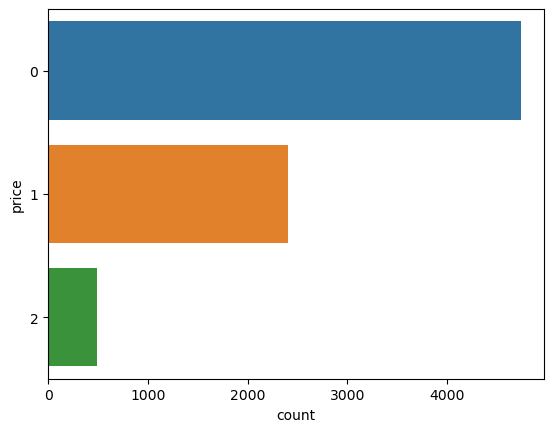

In [11]:
sns.countplot(y="price", data = data_train)

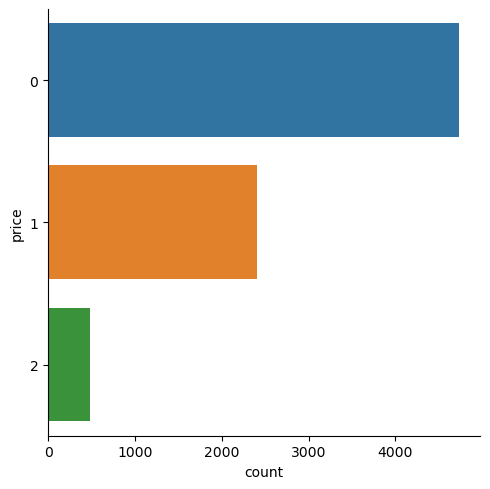

In [12]:
sns.catplot(y="price", kind="count", data=data_train)


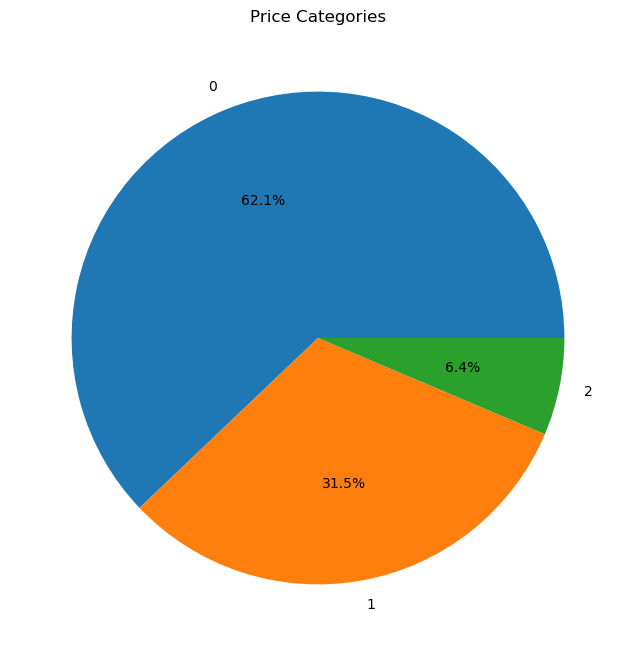

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the number of unique values for the `price` variable
price_counts = data_train['price'].value_counts()

# Visualize the distribution of these values using a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(price_counts, labels=price_counts.index, autopct='%1.1f%%')
ax.set_title('Price Categories')
plt.show()


In [15]:
# preprocess image data

def load_image(file):
    try:
        image = Image.open(
            file
        ).convert('LA').resize((64, 64))
        # read each image as a greyscale image size (64x64x2)
        arr = np.array(image)
        # convert each image to an array
    except:
        arr = np.zeros((64, 64, 2)) 
        # if an image can't be loaded, return an array of zeros (same size: 64x64x2)
    return arr

In [16]:
# loading images:
x_image = np.array([load_image(i) for i in tqdm(data_train.image)]) # load each image from the provided directory using the function created above

# loading summary: (force convert some of the non-string cell to string)
x_train_text = data_train['summary'].astype('str')

  0%|          | 0/7627 [00:00<?, ?it/s]

**We'll encode the prediction labels for item type and price categories using label encoding, and calculate the total number of unique labels for each category. Then, we'll split the dataset into training and testing sets.**

In [17]:
# labels:
y_price = data_train.price # price category/label, either 0, 1, or 2 corresponding to beginner, plus, or premium respectively
y_type = data_train.type.astype('category').cat.codes # rental type label, categorically encode 24 available property types (i.e. hotel, apartment, villa, boat, etc.)

len_price = len(y_price.unique()) # number of unique labels for price
len_type = len(y_type.unique()) # number of unique labels for rental type
print('unique values for price category', len_price, y_price.unique()) # print them so we can see the unique values for our labels
print('unique values for type category', len_type, y_type.unique())

# splitting:

# the following creates training and validation splits for our image and text feature spaces
# along with our two label sets, price and rental type
x_tr_image, x_vl_image, x_tr_text, x_vl_text, y_tr_price, y_vl_price, y_tr_type, y_vl_type = train_test_split(x_image, x_train_text, y_price, y_type, test_size=0.2) # our validation splits are a hold-out set containing 20% of the training set

unique values for price category 3 [1 0 2]
unique values for type category 24 [ 1 17 22 10 18 20  5  2  8  4 23 13 15 16 14 11 19  0 21  3  6 12  7  9]


**We will be using the Tokenizer class to preprocess the textual data**
* This involves converting each text into either a sequence of integers (with each integer corresponding to the index of a token in a dictionary) or a vector where the coefficient for each token can be binary, based on word count or tf-idf.

**The Tokenizer class takes several arguments, including:
**
* num_words: the maximum number of words to keep, based on word frequency. Only the most common (num_words-1) words will be kept.
* filters: a string containing characters that will be filtered from the texts. The default is all punctuation, tabs, and line breaks, minus the ' character.
* lower: a boolean indicating whether to convert the texts to lowercase.
* split: a string indicating the separator for word splitting.
* char_level: a boolean indicating whether every character should be treated as a token.
* oov_token: a string that, if given, will be added to word_index and used to replace out-of-vocabulary words during text_to_sequence calls.

**The resulting preprocessed texts will have all punctuation removed and be split into space-separated sequences of words (which may include the ' character). These sequences will be further split into lists of tokens, which will then be indexed or vectorized.**

In [18]:
vocab_size = 40000 # enforce a threshold on the number of unique words that are tokenized
max_len = 100 # maximum sequence length of a text string, anything longer will be truncated to 100 words


# build vocabulary from training set
tokenizer = Tokenizer(num_words=vocab_size) # initialize tokenizer with a vocabulary size of 40000
tokenizer.fit_on_texts(x_tr_text) # update the vocabulary by fitting on the corpus of text contained in rental text descriptions, keeping only the most common 40000 words


def _preprocess(list_of_text):
    return pad_sequences(
        tokenizer.texts_to_sequences(list_of_text), # transforms each list entry to a sequence of integers based on the vocabulary created from fitting the tokenizer on the training set above
        maxlen=max_len, # enforce max sequence length of 100
        padding='post', # if a sequence length is less than 100, add padding at the end to make it 100 words long
    )
    

# padding is done inside: 
x_tr_text_id = _preprocess(x_tr_text) # preprocess and tokenize list of training sequences
x_vl_text_id = _preprocess(x_vl_text) # preprocess and tokenize list of validation sequences


In [19]:
# number of unique words contained in the vocabulary
print('total words in the dictionary:', tokenizer.num_words)

total words in the dictionary: 40000


## Building The Models

## Used Functions

**plotting result**

In [41]:
import matplotlib.pyplot as plt

def plot_results(history):
    """
    Plot training and validation accuracy and loss for price and type prediction models.
    
    Args:
    history (keras.callbacks.History): History object returned by Keras model training.
    """
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    fig.suptitle('Model Results')
    
    # Plot price accuracy
    axs[0].plot(history.history['price_sparse_categorical_accuracy'])
    axs[0].plot(history.history['val_price_sparse_categorical_accuracy'])
    axs[0].set_title('Price accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['Train', 'Validation'], loc='upper left')
    
    # Plot type accuracy
    axs[1].plot(history.history['type_sparse_categorical_accuracy'])
    axs[1].plot(history.history['val_type_sparse_categorical_accuracy'])
    axs[1].set_title('Type accuracy')
    axs[1].set_ylabel('Accuracy')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['Train', 'Validation'], loc='upper left')
    
    # Plot loss
    axs[2].plot(history.history['loss'])
    axs[2].plot(history.history['val_loss'])
    axs[2].set_title('Model loss')
    axs[2].set_ylabel('Loss')
    axs[2].set_xlabel('Epoch')
    axs[2].legend(['Train', 'Validation'], loc='upper left')
    
    plt.show()


In [42]:


# method used to generate predictions on test set, adopted from code in template
def test(model, filename):
  y_predict = model.predict(
      {
          'summary': x_test_summary,
          'image': x_test_image
      }
  )
  price_predicted = y_predict['price'] 
  price_category_predicted = np.argmax(price_predicted, axis=1) 

  # create the submission dataframe/csv for submission
  pd.DataFrame(
      {'id': data_test.id,
      'price': price_category_predicted}).to_csv(f'{filename}.csv', index=False)

def compile(model, lr=0.001):
  # compile model
  model.compile(
      optimizer=Adam(learning_rate=lr), # using Adam for optimization
      # measuring sparse categorical cross-entropy loss for both price and type labels
      # sparse categorical cross-entropy is used since our labels are integers
      loss={
          'price': 'sparse_categorical_crossentropy',
          'type': 'sparse_categorical_crossentropy',
      },
      # equally weight the loss w.r.t. both labels
      loss_weights={
          'price': 0.5,
          'type': 0.5,       
      },
      # evaluation metric for this task is accuracy, so we measure sparse categorical accuracy for both targets
      # again, our labels are categorical integers, so we use sparse categorical accuracy
      metrics={
          'price': ['SparseCategoricalAccuracy'],
          'type': ['SparseCategoricalAccuracy'],
      },
  )

def train(model, cbs, epochs=20, batch=16, val=0.2):
  # fit our model on our training data
  history = model.fit(
      # our inputs: tokenized text sequences and resized image samples
      x={
          'summary': x_tr_text_id,
          'image': x_tr_image
      },
      # our outputs: price and rental type categories
      y={
          'price': y_tr_price,
          'type': y_tr_type,
      },
      epochs=epochs, # variable, number of iterations over all training data
      batch_size=batch, # variable batch size, samples processed before updating gradients
      # our validation splits for our two input sets and our two target attributes
      validation_data=(
          {
              'summary': x_vl_text_id,
              'image': x_vl_image
          }, 
          {
              'price': y_vl_price,
              'type': y_vl_type,
          }),
      validation_split=val, # validate on a hold-out set of 20%, even though splits were already created above???? This is redundant.
      # use early stopping, monitor the validation price loss and if it does not improve for 5 consecutive epochs, training will stop
      callbacks=cbs,
      verbose=1 # one line per epoch displaying performance metrics
  )
  return history

## Trial 0



### Define a Learning Model

In [22]:
in_text = keras.Input(batch_shape=(None, max_len)) # input shape for batches of text sequences (100 words long)
in_image = keras.Input(batch_shape=(None, 64, 64, 2)) # input shape for batches of images (size 64x64x2)

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text) # get our word embeddings
averaged = tf.reduce_mean(embedded, axis=1) # compute the mean of the embeddings to reduce the rank of the embedding


# image part
cov = Conv2D(32, (16, 16))(in_image) # convolutional layer with 32 filters, and a 16x16 mask, no padding
pl = MaxPool2D((16, 16))(cov) # max pooling with a 16x16 mask, reducing the size to 3x3x32
flattened = Flatten()(pl) # flatten the shape to (288,)


# fusion:
fused = tf.concat([averaged, flattened], axis=-1) # concatenate text features with images

# multi-objectives (each is a multi-class classification)
p_price = Dense(len_price, activation='softmax', name='price')(fused) # predict price label 0, 1, or 2
p_type = Dense(len_type, activation='softmax', name='type')(fused) # predict rental category label [0-23]

# model definition
model = keras.Model(
    inputs={
        'summary': in_text, # text inputs
        'image': in_image # image inputs
    },
    outputs={
        'price': p_price, # label 1: price category (0, 1, or 2)
        'type': p_type, # label 2: type category [0-23]
    },
)

# compile model
model.compile(
    optimizer=Adam(), # using Adam for optimization
    # measuring sparse categorical cross-entropy loss for both price and type labels
    # sparse categorical cross-entropy is used since our labels are integers
    loss={
        'price': 'sparse_categorical_crossentropy',
        'type': 'sparse_categorical_crossentropy',
    },
    # equally weight the loss w.r.t. both labels
    loss_weights={
        'price': 0.5,
        'type': 0.5,       
    },
    # evaluation metric for this task is accuracy, so we measure sparse categorical accuracy for both targets
    # again, our labels are categorical integers, so we use sparse categorical accuracy
    metrics={
        'price': ['SparseCategoricalAccuracy'],
        'type': ['SparseCategoricalAccuracy'],
    },
)


model.summary() # print the structure of the model defined above 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 32)   16416       ['input_2[0][0]']                
                                                                                                  
 embedding (Embedding)          (None, 100, 100)     4000000     ['input_1[0][0]']                
                                                                                              

### Model Training

**By analyzing the training and validation performance, you can decide to modify the number of epochs for training. Additionally, you can use early stopping to monitor the validation loss on type prediction, which is likely the primary task that we want to perform.**

In [23]:
# fit our model on our training data
history = model.fit(
    # our inputs: tokenized text sequences and resized image samples
    x={
        'summary': x_tr_text_id,
        'image': x_tr_image
    },
    # our outputs: price and rental type categories
    y={
        'price': y_tr_price,
        'type': y_tr_type,
    },
    epochs=20, # train for 20 epochs (iterations over all training data)
    batch_size=16, # batch size of 16 (samples processed before updating gradients)
    # our validation splits for our two input sets and our two target attributes
    validation_data=(
        {
            'summary': x_vl_text_id,
            'image': x_vl_image
         }, 
        {
            'price': y_vl_price,
            'type': y_vl_type,
        }),
    validation_split=0.2, # validate on a hold-out set of 20%, even though splits were already created above???? Pretty sure this is redundant.
    # use early stopping, monitor the validation price loss and if it does not improve for 5 consecutive epochs, training will stop
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5, )
    ],
    verbose=1 # one line per epoch displaying performance metrics
)

Epoch 1/20
382/382 [==============================] - 32s 75ms/step - loss: 1.0280 - price_loss: 0.8397 - type_loss: 1.2163 - price_sparse_categorical_accuracy: 0.6253 - type_sparse_categorical_accuracy: 0.7558 - val_loss: 0.9462 - val_price_loss: 0.8521 - val_type_loss: 1.0403 - val_price_sparse_categorical_accuracy: 0.6029 - val_type_sparse_categorical_accuracy: 0.7425
Epoch 2/20
382/382 [==============================] - 7s 20ms/step - loss: 0.8817 - price_loss: 0.7893 - type_loss: 0.9741 - price_sparse_categorical_accuracy: 0.6322 - type_sparse_categorical_accuracy: 0.7592 - val_loss: 0.9097 - val_price_loss: 0.8125 - val_type_loss: 1.0069 - val_price_sparse_categorical_accuracy: 0.6180 - val_type_sparse_categorical_accuracy: 0.7425
Epoch 3/20
382/382 [==============================] - 6s 15ms/step - loss: 0.8315 - price_loss: 0.7320 - type_loss: 0.9310 - price_sparse_categorical_accuracy: 0.6658 - type_sparse_categorical_accuracy: 0.7592 - val_loss: 0.8667 - val_price_loss: 0.7687

### Model Visualization

In [24]:
# let's try training longer to see if a trend presents itself over time
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=10,)]

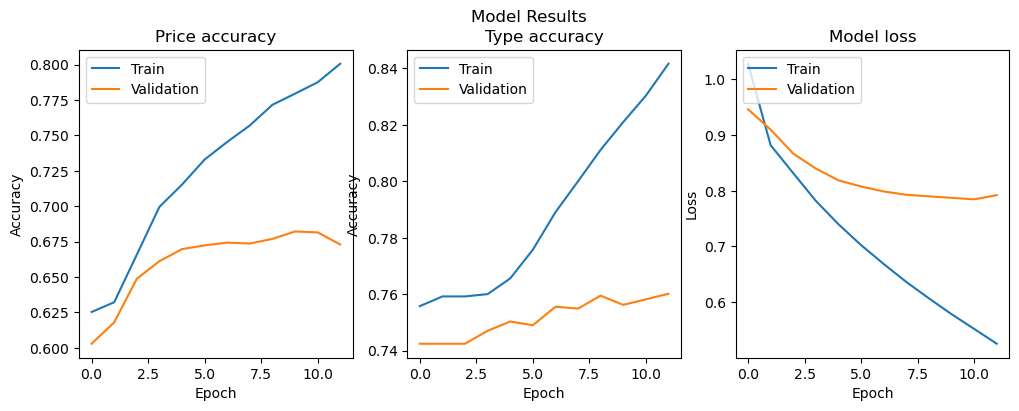

In [25]:
# let's look at the accuracy and loss curves from the template
plot_results(history)

### Model Prediction

In [26]:
x_test_summary = _preprocess(data_test.summary.astype(str)) # create sequences for the text summaries in the test set
x_test_image = np.array([load_image(i) for i in tqdm(data_test.image)]) # load and resize the images from the test set

  0%|          | 0/7360 [00:00<?, ?it/s]

In [27]:
# generate predictions on the test set using the tokenized summaries and re-sized images
y_predict = model.predict(
    {
        'summary': x_test_summary,
        'image': x_test_image
    }
)

price_predicted = y_predict['price'] # this is the target attribute we care about for this task
print(price_predicted) # probability the sample belongs to each of the categories
price_category_predicted = np.argmax(price_predicted, axis=1) # pick the highest value, and assign it as the predicted class
print(price_category_predicted) # print the categorical predictions, which are in [0,1,2]


230/230 [==============================] - 1s 2ms/step
[[0.0298313  0.8999556  0.07021311]
 [0.23255683 0.7140274  0.05341574]
 [0.4862853  0.47906318 0.03465147]
 ...
 [0.7340274  0.22815265 0.03781993]
 [0.15162204 0.78905237 0.05932559]
 [0.70593333 0.27630723 0.01775937]]
[1 1 0 ... 0 1 0]


In [28]:
# create the submission dataframe/csv for submission
pd.DataFrame({'id': data_test.id,'price': price_category_predicted}).to_csv('submission_for_trail_0.csv', index=False)

In [29]:
#clear session
tf.keras.backend.clear_session()

## Trial 1 (LSTM)

**Trial 1 plan:**

- Develop helper functions to be used throughout the notebook
- Replace the reduce_mean layer with an LSTM layer and experiment with different numbers of units.

**This modification should improve the model's performance by incorporating more information from the input sentence embeddings.**

In [30]:
# copied the model from the template and modifying it here
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2)) # input shape for batches of images (size 64x64x2)

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text) # get our word embeddings

# only part I'm changing is adding an LSTM layer on top of the embedding layer
# averaged = tf.reduce_mean(embedded, axis=1) # compute the mean of the embeddings to reduce the rank of the embedding
lstm = LSTM(50)(embedded)

# image part
cov = Conv2D(32, (16, 16))(in_image) # convolutional layer with 32 filters, and a 16x16 mask, no padding
pl = MaxPool2D((16, 16))(cov) # max pooling with a 16x16 mask, reducing the size to 3x3x32
flattened = Flatten()(pl) # flatten the shape to (288,)


# fusion:
fused = tf.concat([lstm, flattened], axis=-1) # concatenate text features with images

# multi-objectives (each is a multi-class classification)
p_price = Dense(len_price, activation='softmax', name='price')(fused) # predict price label 0, 1, or 2
p_type = Dense(len_type, activation='softmax', name='type')(fused) # predict rental category label [0-23]

# model definition
lstm_model = keras.Model(
    inputs={
        'summary': in_text, # text inputs
        'image': in_image # image inputs
    },
    outputs={
        'price': p_price, # label 1: price category (0, 1, or 2)
        'type': p_type, # label 2: type category [0-23]
    },
)

compile(lstm_model) # compiles the model with the helper to improve readability
lstm_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 32)   16416       ['input_2[0][0]']                
                                                                                                  
 embedding (Embedding)          (None, 100, 100)     4000000     ['input_1[0][0]']                
                                                                                              

In [32]:
history = train(lstm_model, callbacks) # use train helper to improve readability

Epoch 1/20
382/382 [==============================] - 9s 24ms/step - loss: 0.9172 - price_loss: 0.8310 - type_loss: 1.0034 - price_sparse_categorical_accuracy: 0.6256 - type_sparse_categorical_accuracy: 0.7592 - val_loss: 0.9723 - val_price_loss: 0.8750 - val_type_loss: 1.0697 - val_price_sparse_categorical_accuracy: 0.6029 - val_type_sparse_categorical_accuracy: 0.7425
Epoch 2/20
382/382 [==============================] - 6s 16ms/step - loss: 0.9170 - price_loss: 0.8306 - type_loss: 1.0034 - price_sparse_categorical_accuracy: 0.6256 - type_sparse_categorical_accuracy: 0.7592 - val_loss: 0.9596 - val_price_loss: 0.8723 - val_type_loss: 1.0469 - val_price_sparse_categorical_accuracy: 0.6029 - val_type_sparse_categorical_accuracy: 0.7425
Epoch 3/20
382/382 [==============================] - 5s 14ms/step - loss: 0.9172 - price_loss: 0.8297 - type_loss: 1.0048 - price_sparse_categorical_accuracy: 0.6256 - type_sparse_categorical_accuracy: 0.7592 - val_loss: 0.9614 - val_price_loss: 0.8764 

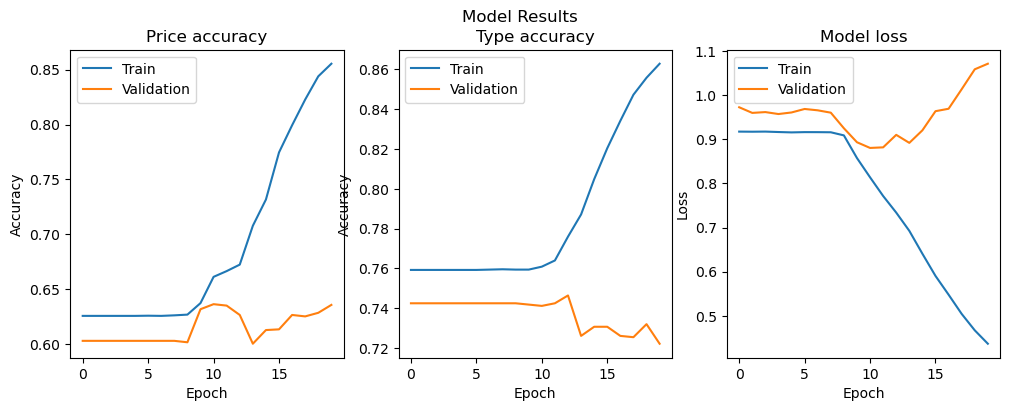

In [39]:
# looking at the curves below, we see a similar behaviour to that in the template. 
# The model does not appear to be learning much, see the training curve.
plot_results(history)

In [40]:
# Generate prediction File
test(lstm_model,'sub_LSTM')

230/230 [==============================] - 1s 4ms/step


## Trial 2, (GRU)

Plan for trial 2: Let's try a GRU layer instead And see how it goes

In [43]:
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2)) # input shape for batches of images (size 64x64x2)

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text) # get our word embeddings
# averaged = tf.reduce_mean(embedded, axis=1) # compute the mean of the embeddings to reduce the rank of the embedding
lstm = GRU(20)(embedded) # fewer hidden units might improve training time?

# image part
cov = Conv2D(32, (16, 16))(in_image) # convolutional layer with 32 filters, and a 16x16 mask, no padding
pl = MaxPool2D((16, 16))(cov) # max pooling with a 16x16 mask, reducing the size to 3x3x32
flattened = Flatten()(pl) # flatten the shape


# fusion:
fused = tf.concat([lstm, flattened], axis=-1) # concatenate text features with images

# multi-objectives (each is a multi-class classification)
p_price = Dense(len_price, activation='softmax', name='price')(fused) # predict price label 0, 1, or 2
p_type = Dense(len_type, activation='softmax', name='type')(fused) # predict rental category label [0-23]

# model definition
gru_model = keras.Model(
    inputs={
        'summary': in_text, # text inputs
        'image': in_image # image inputs
    },
    outputs={
        'price': p_price, # label 1: price category (0, 1, or 2)
        'type': p_type, # label 2: type category [0-23]
    },
)

# compile this new model including the GRU layer and print the architecture
compile(gru_model)
gru_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, 49, 49, 32)   16416       ['input_4[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 100, 100)     4000000     ['input_3[0][0]']                
                                                                                            

In [44]:
# train with the same hyperparameters in the template, 20 epochs with a batch size of 16
history = train(gru_model, callbacks)

Epoch 1/20
382/382 [==============================] - 23s 51ms/step - loss: 1.0161 - price_loss: 0.8459 - type_loss: 1.1863 - price_sparse_categorical_accuracy: 0.6207 - type_sparse_categorical_accuracy: 0.7571 - val_loss: 0.9617 - val_price_loss: 0.8786 - val_type_loss: 1.0447 - val_price_sparse_categorical_accuracy: 0.6029 - val_type_sparse_categorical_accuracy: 0.7425
Epoch 2/20
382/382 [==============================] - 7s 19ms/step - loss: 0.9158 - price_loss: 0.8296 - type_loss: 1.0020 - price_sparse_categorical_accuracy: 0.6256 - type_sparse_categorical_accuracy: 0.7592 - val_loss: 0.9578 - val_price_loss: 0.8719 - val_type_loss: 1.0437 - val_price_sparse_categorical_accuracy: 0.6029 - val_type_sparse_categorical_accuracy: 0.7425
Epoch 3/20
382/382 [==============================] - 5s 14ms/step - loss: 0.8956 - price_loss: 0.8066 - type_loss: 0.9846 - price_sparse_categorical_accuracy: 0.6278 - type_sparse_categorical_accuracy: 0.7594 - val_loss: 0.9158 - val_price_loss: 0.8134

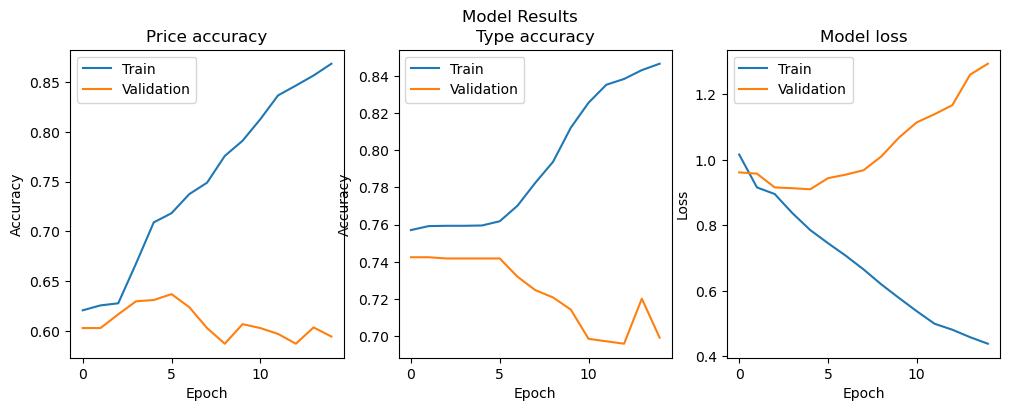

In [45]:
plot_results(history)

In [46]:
# Generating predictions using the GRU model
test(gru_model,'Submission_GRU')

230/230 [==============================] - 1s 4ms/step


## Trial 3 - Adding Depth to Image Layers

**Trial 3 will involve increasing the depth of the CNN in the image part of the network to observe its effects on performance.**

In [47]:
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2)) # input shape for batches of images (size 64x64x2)

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text) # get our word embeddings
# averaged = tf.reduce_mean(embedded, axis=1) # compute the mean of the embeddings to reduce the rank of the embedding
lstm = GRU(20)(embedded)

# image part
cov = Conv2D(32, (3, 3))(in_image) # convolutional layer with 32 filters, and a 3x3 mask, no padding
pl = MaxPool2D((3, 3))(cov) # max pooling with a 3x3 mask, reducing the size to 20x20x32
cov2 = Conv2D(32, (2,2))(pl) # convolutional layer with 32 filters, and a 2x2 mask, no padding
pl2 = MaxPool2D((2,2))(cov2) # max pooling with a 2x2 mask, reducing the size to 9x9x32
flattened = Flatten()(pl2) # flatten the shape to (2592,)


# fusion:
fused = tf.concat([lstm, flattened], axis=-1) # concatenate text features with image features

# multi-objectives (each is a multi-class classification)
p_price = Dense(len_price, activation='softmax', name='price')(fused) # predict price label 0, 1, or 2
p_type = Dense(len_type, activation='softmax', name='type')(fused) # predict rental category label [0-23]

# model definition
cnn_model = keras.Model(
    inputs={
        'summary': in_text, # text inputs
        'image': in_image # image inputs
    },
    outputs={
        'price': p_price, # label 1: price category (0, 1, or 2)
        'type': p_type, # label 2: type category [0-23]
    },
)

# compile the model with the updated CNN component and print the summary
compile(cnn_model)
cnn_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 62, 62, 32)   608         ['input_6[0][0]']                
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 20, 20, 32)  0           ['conv2d_2[0][0]']               
                                                                                                  
 input_5 (InputLayer)           [(None, 100)]        0           []                               
                                                                                            

In [48]:
# training on 20 epochs with a batch size of 16, early stopping with a patience of 10
history = train(cnn_model, callbacks)

Epoch 1/20
382/382 [==============================] - 23s 52ms/step - loss: 0.9638 - price_loss: 0.8423 - type_loss: 1.0853 - price_sparse_categorical_accuracy: 0.6217 - type_sparse_categorical_accuracy: 0.7558 - val_loss: 0.9628 - val_price_loss: 0.8762 - val_type_loss: 1.0494 - val_price_sparse_categorical_accuracy: 0.6029 - val_type_sparse_categorical_accuracy: 0.7425
Epoch 2/20
382/382 [==============================] - 6s 16ms/step - loss: 0.9241 - price_loss: 0.8343 - type_loss: 1.0138 - price_sparse_categorical_accuracy: 0.6256 - type_sparse_categorical_accuracy: 0.7592 - val_loss: 0.9637 - val_price_loss: 0.8754 - val_type_loss: 1.0519 - val_price_sparse_categorical_accuracy: 0.6029 - val_type_sparse_categorical_accuracy: 0.7425
Epoch 3/20
382/382 [==============================] - 5s 14ms/step - loss: 0.9229 - price_loss: 0.8333 - type_loss: 1.0124 - price_sparse_categorical_accuracy: 0.6256 - type_sparse_categorical_accuracy: 0.7592 - val_loss: 0.9592 - val_price_loss: 0.8694

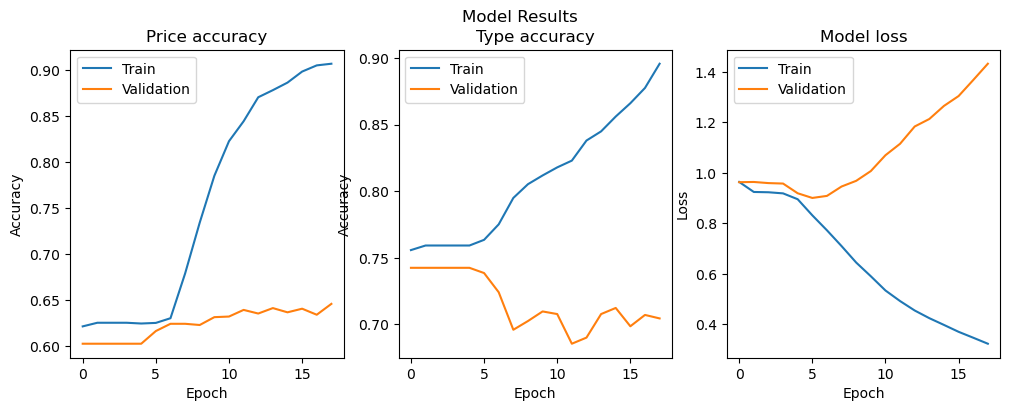

In [49]:
# from these results, it looks like we're starting to overfit
plot_results(history)

In [50]:
# generating predictions
test(cnn_model,'Submission_CNN')

230/230 [==============================] - 1s 3ms/step


## Trial 4 - Bi-directional

**Let's explore the effect of adding bidirectionality to the GRU layer by running trial 4 and analyzing the performance.**

In [51]:
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2)) # input shape for batches of images (size 64x64x2)

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text) # get our word embeddings
bi_gru = Bidirectional(GRU(20))(embedded) # creating a bidirectional GRU layer, with 20 units as before

# image part
cov = Conv2D(32, (3, 3))(in_image) # convolutional layer with 32 filters, and a 16x16 mask, no padding
pl = MaxPool2D((3, 3))(cov) # max pooling with a 3x3 mask, reducing the size to 20x20x32
cov2 = Conv2D(32, (2,2))(pl) # convolutional layer with 32 filters, and a 2x2 mask, no padding
pl2 = MaxPool2D((2,2))(cov2) # max pooling with a 2x2 mask, reducing the size to 9x9x32
flattened = Flatten()(pl2) # flatten the shape to (2592,)


# fusion:
fused = tf.concat([bi_gru, flattened], axis=-1) # concatenate text features with images

# multi-objectives (each is a multi-class classification)
p_price = Dense(len_price, activation='softmax', name='price')(fused) # predict price label 0, 1, or 2
p_type = Dense(len_type, activation='softmax', name='type')(fused) # predict rental category label [0-23]

# model definition
bi_gru_model = keras.Model(
    inputs={
        'summary': in_text, # text inputs
        'image': in_image # image inputs
    },
    outputs={
        'price': p_price, # label 1: price category (0, 1, or 2)
        'type': p_type, # label 2: type category [0-23]
    },
)

# compiling the bidirectional model and printing a summary of the architecture
compile(bi_gru_model)
bi_gru_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 62, 62, 32)   608         ['input_8[0][0]']                
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 20, 20, 32)  0           ['conv2d_4[0][0]']               
                                                                                                  
 input_7 (InputLayer)           [(None, 100)]        0           []                               
                                                                                            

In [52]:
# training on 20 epochs, batch size to 32 to improve training speed
history = train(bi_gru_model, callbacks, 20, 32)

Epoch 1/20
191/191 [==============================] - 27s 119ms/step - loss: 0.9754 - price_loss: 0.8323 - type_loss: 1.1185 - price_sparse_categorical_accuracy: 0.6263 - type_sparse_categorical_accuracy: 0.7548 - val_loss: 0.9091 - val_price_loss: 0.8381 - val_type_loss: 0.9802 - val_price_sparse_categorical_accuracy: 0.6317 - val_type_sparse_categorical_accuracy: 0.7425
Epoch 2/20
191/191 [==============================] - 10s 55ms/step - loss: 0.8317 - price_loss: 0.7695 - type_loss: 0.8938 - price_sparse_categorical_accuracy: 0.6473 - type_sparse_categorical_accuracy: 0.7589 - val_loss: 0.8804 - val_price_loss: 0.8014 - val_type_loss: 0.9594 - val_price_sparse_categorical_accuracy: 0.6337 - val_type_sparse_categorical_accuracy: 0.7405
Epoch 3/20
191/191 [==============================] - 7s 34ms/step - loss: 0.7796 - price_loss: 0.7296 - type_loss: 0.8296 - price_sparse_categorical_accuracy: 0.6669 - type_sparse_categorical_accuracy: 0.7673 - val_loss: 0.8707 - val_price_loss: 0.79

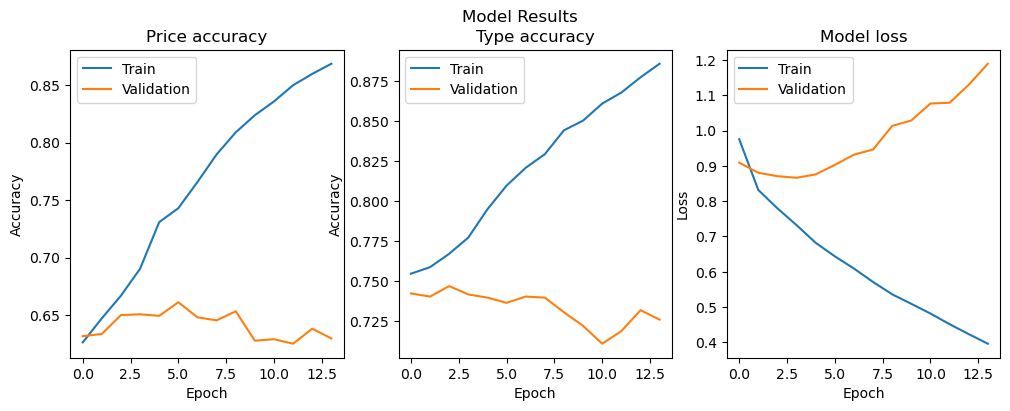

In [53]:
plot_results(history)

In [71]:
# generating predictions
test(bi_gru_model,'Sub_Bi')

230/230 [==============================] - 1s 5ms/step


## Trial 5, Drop-out

**For trial 5, we plan to implement drop-out regularization in the image component of the model to mitigate overfitting issues. Additionally, we will utilize L2 recurrent regularization on the text component of the model to further enhance its performance.**

In [55]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding. 
embedded = keras.layers.Embedding(tokenizer.num_words, 300)(in_text)
dropout= Dropout(.4)(embedded)
bi_directional =  Bidirectional(LSTM(5))(dropout)

# image part 
# simple conv2d.
cov1 = Conv2D(10, (16, 16) , activation='relu')(in_image) # 10 number of filters and  (15, 15) size of filter
dropout = Dropout(.4)(cov1)
pl = MaxPool2D((16, 16))(dropout)
flattened = Flatten()(pl)

# fusion - combinig both
fused = tf.concat([bi_directional, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    }
)


# compile model with optimizer, loss values for each task, 
# loss weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_9 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 conv2d_6 (Conv2D)              (None, 49, 49, 10)   5130        ['input_10[0][0]']               
                                                                                                  
 embedding_4 (Embedding)        (None, 100, 300)     12000000    ['input_9[0][0]']                
                                                                                            

In [56]:
# increasing the batch size to 64 to improve training speed, still 20 epochs
history = train(model, callbacks, 20, 64) # using a batch size of 64 to speed up training

Epoch 1/20


2023-04-14 00:04:11.760032: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_4/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


96/96 [==============================] - 21s 171ms/step - loss: 1.5420 - price_loss: 0.8976 - type_loss: 2.1865 - price_sparse_categorical_accuracy: 0.6210 - type_sparse_categorical_accuracy: 0.7399 - val_loss: 1.1313 - val_price_loss: 0.8690 - val_type_loss: 1.3936 - val_price_sparse_categorical_accuracy: 0.6029 - val_type_sparse_categorical_accuracy: 0.7425
Epoch 2/20
96/96 [==============================] - 9s 99ms/step - loss: 0.9883 - price_loss: 0.8240 - type_loss: 1.1527 - price_sparse_categorical_accuracy: 0.6256 - type_sparse_categorical_accuracy: 0.7592 - val_loss: 0.9884 - val_price_loss: 0.8691 - val_type_loss: 1.1077 - val_price_sparse_categorical_accuracy: 0.6029 - val_type_sparse_categorical_accuracy: 0.7425
Epoch 3/20
96/96 [==============================] - 7s 69ms/step - loss: 0.9246 - price_loss: 0.8219 - type_loss: 1.0273 - price_sparse_categorical_accuracy: 0.6256 - type_sparse_categorical_accuracy: 0.7592 - val_loss: 0.9640 - val_price_loss: 0.8629 - val_type_loss

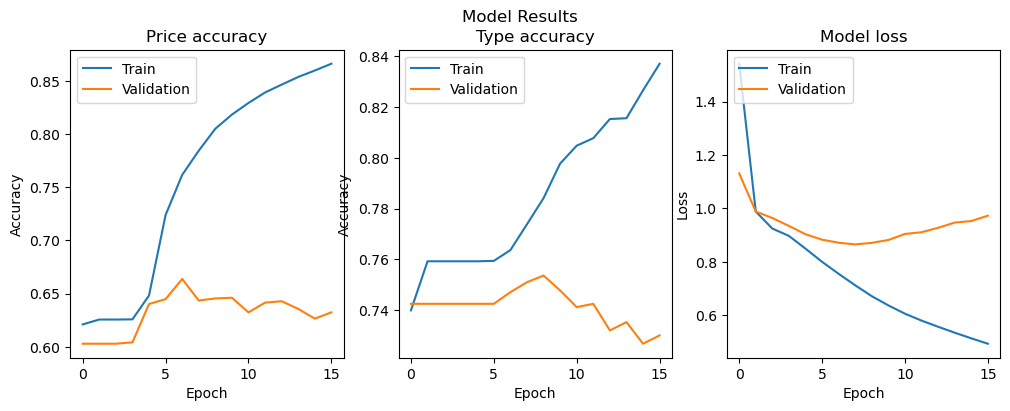

In [57]:
# still overfitting, but the curves are much smoother, as expected
plot_results(history)

In [58]:
# generating predictions
test(model,'Submission_Dropout')

230/230 [==============================] - 2s 5ms/step


## Trial 6, Drop-out _2


Plan for trial 6: Same As Trail 4 But using it on another Model (Trial 0)

In [59]:
in_text = keras.Input(batch_shape=(None, max_len)) # input shape for batches of text sequences (100 words long)
in_image = keras.Input(batch_shape=(None, 64, 64, 2)) # input shape for batches of images (size 64x64x2)

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text) # get our word embeddings
dropout= Dropout(.3)(embedded)
averaged = tf.reduce_mean(embedded, axis=1) # compute the mean of the embeddings to reduce the rank of the embedding


# image part
cov = Conv2D(32, (16, 16))(in_image) # convolutional layer with 32 filters, and a 16x16 mask, no padding
dropout= Dropout(.3)(cov)
pl = MaxPool2D((16, 16))(dropout) # max pooling with a 16x16 mask, reducing the size to 3x3x32
flattened = Flatten()(pl) # flatten the shape to (288,)


# fusion:
fused = tf.concat([averaged, flattened], axis=-1) # concatenate text features with images

# multi-objectives (each is a multi-class classification)
p_price = Dense(len_price, activation='softmax', name='price')(fused) # predict price label 0, 1, or 2
p_type = Dense(len_type, activation='softmax', name='type')(fused) # predict rental category label [0-23]

# model definition
model = keras.Model(
    inputs={
        'summary': in_text, # text inputs
        'image': in_image # image inputs
    },
    outputs={
        'price': p_price, # label 1: price category (0, 1, or 2)
        'type': p_type, # label 2: type category [0-23]
    },
)

# compile model
model.compile(
    optimizer=Adam(), # using Adam for optimization
    # measuring sparse categorical cross-entropy loss for both price and type labels
    # sparse categorical cross-entropy is used since our labels are integers
    loss={
        'price': 'sparse_categorical_crossentropy',
        'type': 'sparse_categorical_crossentropy',
    },
    # equally weight the loss w.r.t. both labels
    loss_weights={
        'price': 0.5,
        'type': 0.5,       
    },
    # evaluation metric for this task is accuracy, so we measure sparse categorical accuracy for both targets
    # again, our labels are categorical integers, so we use sparse categorical accuracy
    metrics={
        'price': ['SparseCategoricalAccuracy'],
        'type': ['SparseCategoricalAccuracy'],
    },
)


model.summary() # print the structure of the model defined above 

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_7 (Conv2D)              (None, 49, 49, 32)   16416       ['input_12[0][0]']               
                                                                                                  
 input_11 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 dropout_3 (Dropout)            (None, 49, 49, 32)   0           ['conv2d_7[0][0]']               
                                                                                            

In [60]:
# increasing the batch size to 64 to improve training speed, still 20 epochs
history = train(model, callbacks, 20, 64) # using a batch size of 64 to speed up training

Epoch 1/20


2023-04-14 00:05:30.577534: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_5/dropout_3/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


96/96 [==============================] - 16s 158ms/step - loss: 1.3974 - price_loss: 0.9013 - type_loss: 1.8935 - price_sparse_categorical_accuracy: 0.6215 - type_sparse_categorical_accuracy: 0.7464 - val_loss: 1.0042 - val_price_loss: 0.8646 - val_type_loss: 1.1438 - val_price_sparse_categorical_accuracy: 0.6029 - val_type_sparse_categorical_accuracy: 0.7425
Epoch 2/20
96/96 [==============================] - 7s 76ms/step - loss: 0.9126 - price_loss: 0.8220 - type_loss: 1.0031 - price_sparse_categorical_accuracy: 0.6256 - type_sparse_categorical_accuracy: 0.7592 - val_loss: 0.9757 - val_price_loss: 0.8592 - val_type_loss: 1.0923 - val_price_sparse_categorical_accuracy: 0.6029 - val_type_sparse_categorical_accuracy: 0.7425
Epoch 3/20
96/96 [==============================] - 7s 70ms/step - loss: 0.8998 - price_loss: 0.8117 - type_loss: 0.9879 - price_sparse_categorical_accuracy: 0.6256 - type_sparse_categorical_accuracy: 0.7592 - val_loss: 0.9627 - val_price_loss: 0.8473 - val_type_loss

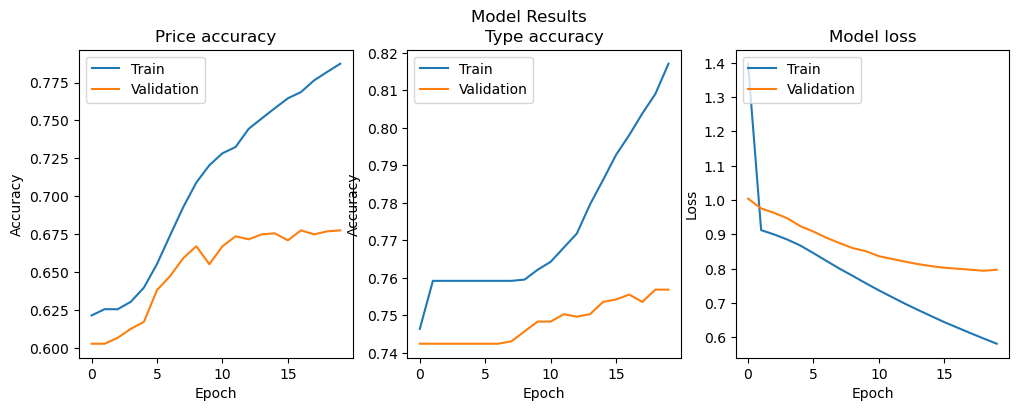

In [61]:
plot_results(history)

In [70]:
# generating predictions I Found that Using DropOut = 0.3 is the best I can get so far
test(model,'Sub_Drop_out_2')

230/230 [==============================] - 1s 2ms/step


##  Trial Using VGG(Bonus)

**There are several advantages to using transfer learning, including saving resources and improving efficiency when training new models. As a result, we anticipate an improvement in performance.**

In [63]:
from keras.applications.vgg16 import VGG16

# VGG needs input images with 3 channels, so I'll extend the training data to have 3 channels and appear RGB
# x_tr_image is currently (6101, 64, 64, 2)
rgb_tr = x_tr_image[:,:,:,0]
rgb_vl = x_vl_image[:,:,:,0]
# rgb.shape # now it's (6101, 64, 64)
rgb_tr = np.repeat(rgb_tr[..., np.newaxis], 3, -1) # repeat the same values across 3 channels
rgb_vl = np.repeat(rgb_vl[..., np.newaxis], 3, -1) # repeat the same values across 3 channels

In [64]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Rescaling

# bringing VGG16 into the mix
base = VGG16(include_top=False, input_shape=(64,64,3)) # instantiating the base model we wish to tune
base.trainable = False # freezing the weights

In [65]:
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 3)) # input shape for batches of images (size 64x64x2)

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text) # get our word embeddings
# averaged = tf.reduce_mean(embedded, axis=1) # compute the mean of the embeddings to reduce the rank of the embedding
attention = MultiHeadAttention(num_heads=2, key_dim=2)(embedded, embedded)
bi_lstm = Bidirectional(GRU(50, recurrent_regularizer='l2'))(attention)


# image part
scaling = Rescaling(1./127.5, offset=-1)(in_image) # rescaling to [-1,1] for VGG16
vgg = base(scaling, training=False) # pass the base model the scaled inputs
pl = GlobalAveragePooling2D()(vgg) # global average pooling, pretty much the same as flattening
do = Dropout(0.2)(pl) # dropout at a rate of 20%
fl = Flatten()(do) # flattening anyways


# fusion:
fused = tf.concat([bi_lstm, fl], axis=-1) # concatenate text features with images

# multi-objectives (each is a multi-class classification)
p_price = Dense(len_price, activation='softmax', name='price')(fused) # predict price label 0, 1, or 2
p_type = Dense(len_type, activation='softmax', name='type')(fused) # predict rental category label [0-23]

# model definition
attn_model = keras.Model(
    inputs={
        'summary': in_text, # text inputs
        'image': in_image # image inputs
    },
    outputs={
        'price': p_price, # label 1: price category (0, 1, or 2)
        'type': p_type, # label 2: type category [0-23]
    },
)

# compiling the updated attention model and printing the summary
compile(attn_model)
attn_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 64, 64, 3)    0           ['input_15[0][0]']               
                                                                                                  
 input_14 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 vgg16 (Functional)             (None, 2, 2, 512)    14714688    ['rescaling[0][0]']              
                                                                                            

In [66]:
# history = train(lstm_model, callbacks)
history = attn_model.fit(
      # our inputs: tokenized text sequences and resized image samples
      x={
          'summary': x_tr_text_id,
          'image': rgb_tr # can't use my helper function as I have a different image input
      },
      # our outputs: price and rental type categories
      y={
          'price': y_tr_price,
          'type': y_tr_type,
      },
      epochs=20, # train for 20 epochs (iterations over all training data)
      batch_size=32, # batch size of 16 (samples processed before updating gradients)
      # our validation splits for our two input sets and our two target attributes
      validation_data=(
          {
              'summary': x_vl_text_id,
              'image': rgb_vl # can't use my helper function as I have a different validation set
          }, 
          {
              'price': y_vl_price,
              'type': y_vl_type,
          }),
      # validation_split=0.2, # validate on a hold-out set of 20%, even though splits were already created above???? This is redundant.
      # use early stopping, monitor the validation price loss and if it does not improve for 5 consecutive epochs, training will stop
      callbacks=[
          tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5, ) # setting patience back to 5
      ],
      verbose=1 # one line per epoch displaying performance metrics
  )

Epoch 1/20
191/191 [==============================] - 25s 99ms/step - loss: 1.3284 - price_loss: 0.8719 - type_loss: 1.2479 - price_sparse_categorical_accuracy: 0.5951 - type_sparse_categorical_accuracy: 0.6994 - val_loss: 0.9719 - val_price_loss: 0.8635 - val_type_loss: 1.0272 - val_price_sparse_categorical_accuracy: 0.6029 - val_type_sparse_categorical_accuracy: 0.7425
Epoch 2/20
191/191 [==============================] - 10s 52ms/step - loss: 0.8729 - price_loss: 0.8094 - type_loss: 0.9207 - price_sparse_categorical_accuracy: 0.6276 - type_sparse_categorical_accuracy: 0.7645 - val_loss: 0.8845 - val_price_loss: 0.8284 - val_type_loss: 0.9379 - val_price_sparse_categorical_accuracy: 0.6134 - val_type_sparse_categorical_accuracy: 0.7471
Epoch 3/20
191/191 [==============================] - 8s 40ms/step - loss: 0.7993 - price_loss: 0.7722 - type_loss: 0.8248 - price_sparse_categorical_accuracy: 0.6309 - type_sparse_categorical_accuracy: 0.7738 - val_loss: 0.8690 - val_price_loss: 0.796

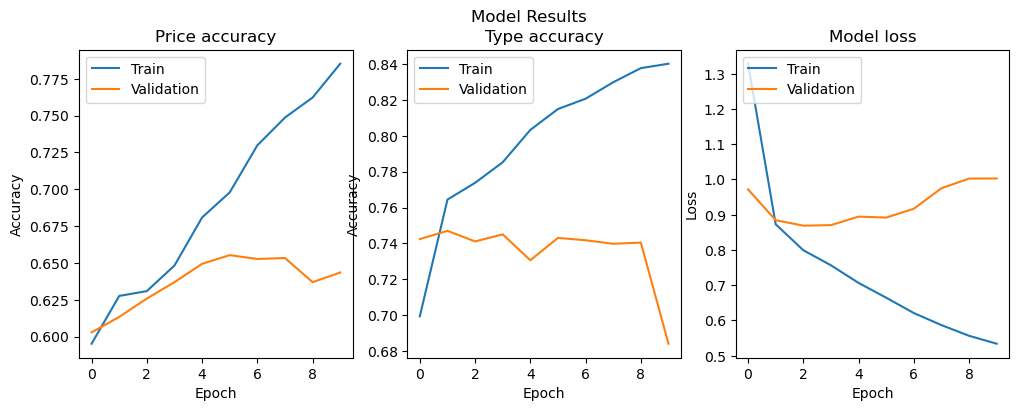

In [67]:
# this looks a lot better! Typical training/validation loss curve where we can see overfitting start to occur after just a few epochs
plot_results(history)

In [68]:
# preprocess the test images the same way as our training and validation sets
rgb_test = x_test_image[:,:,:,0]
rgb_test = np.repeat(rgb_test[..., np.newaxis], 3, -1) # repeat the same values across 3 channels

In [69]:
y_predict = attn_model.predict(
    {
        'summary': x_test_summary,
        'image': rgb_test
    }
)
price_predicted = y_predict['price'] 
price_category_predicted = np.argmax(price_predicted, axis=1) 

# create the submission dataframe/csv for submission
pd.DataFrame(
    {'id': data_test.id,
    'price': price_category_predicted}).to_csv('sub_VGG.csv', index=False)

230/230 [==============================] - 4s 12ms/step
